In [33]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [5]:
#Importando pacotes necessários
import os
from zipfile import ZipFile
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

In [6]:
#Caminho para os arquivos utilizados
pasta = '/content/drive/MyDrive/Colab Datasets/eleicoes/'
arquivo_resultado_2024 = os.path.join(pasta, 'votacao_candidato_munzona_2024.zip')
arquivo_partidos_2024 = os.path.join(pasta,'pdt.csv')
arquivo_BR_municipios_shapefile = os.path.join(pasta, 'BR_Municipios_2022/BR_Municipios_2022.shp')

In [7]:
import pandas as pd

# Define o caminho completo do arquivo
file_path = '/content/drive/MyDrive/Colab Datasets/eleicoes/pdt.csv'

# Lê o arquivo CSV com a codificação especificada
df = pd.read_csv(file_path, encoding='ISO-8859-1')

# Exibe as primeiras linhas do arquivo
print(df.head())

                municipio
0              ABRE CAMPO
1                 ALFENAS
2            ALTO CAPARAÓ
3          ANTÔNIO CARLOS
4  ANTÔNIO PRADO DE MINAS


In [8]:
df

,municipio
0,ABRE CAMPO
1,ALFENAS
2,ALTO CAPARAÓ
3,ANTÔNIO CARLOS
4,ANTÔNIO PRADO DE MINAS
...,...
221,VISCONDE DO RIO BRANCO
222,VÁRZEA DA PALMA
223,WENCESLAU BRAZ
224,ÁGUA BOA


Número de municípios com vereadores encontrados: 225

Municípios encontrados:
['ABRE CAMPO', 'AÇUCENA', 'ÁGUA BOA', 'ÁGUAS VERMELHAS', 'ALFENAS', 'ALTO CAPARAÓ', 'ANTÔNIO CARLOS', 'ANTÔNIO PRADO DE MINAS', 'ARAÇAÍ', 'ARAXÁ', 'ARICANDUVA', 'AUGUSTO DE LIMA', 'BAMBUÍ', 'BARBACENA', 'BARRA LONGA', 'BELMIRO BRAGA', 'BELO HORIZONTE', 'BELO VALE', 'BERIZAL', 'BETIM', 'BOCAIÚVA', 'BOM JESUS DO AMPARO', 'BONITO DE MINAS', 'BRAÚNAS', 'BUENÓPOLIS', 'CAETANÓPOLIS', 'CAJURI', 'CAMBUÍ', 'CAMBUQUIRA', 'CAMPANHA', 'CAMPOS ALTOS', 'CANA VERDE', 'CANTAGALO', 'CAPETINGA', 'CAPIM BRANCO', 'CARANGOLA', 'CARBONITA', 'CARMO DE MINAS', 'CARMO DO CAJURU', 'CARVALHÓPOLIS', 'CATAGUASES', 'CATUJI', 'CENTRAL DE MINAS', 'CHAPADA GAÚCHA', 'CLÁUDIO', 'CONCEIÇÃO DO MATO DENTRO', 'CONCEIÇÃO DO RIO VERDE', 'CONTAGEM', 'CORAÇÃO DE JESUS', 'CÓRREGO DO BOM JESUS', 'CRISTIANO OTONI', 'CRUCILÂNDIA', 'CUPARAQUE', 'CURRAL DE DENTRO', 'DELFIM MOREIRA', 'DESCOBERTO', 'DESTERRO DO MELO', 'DIAMANTINA', 'DIVISA ALEGRE', 'DOM CAVAT

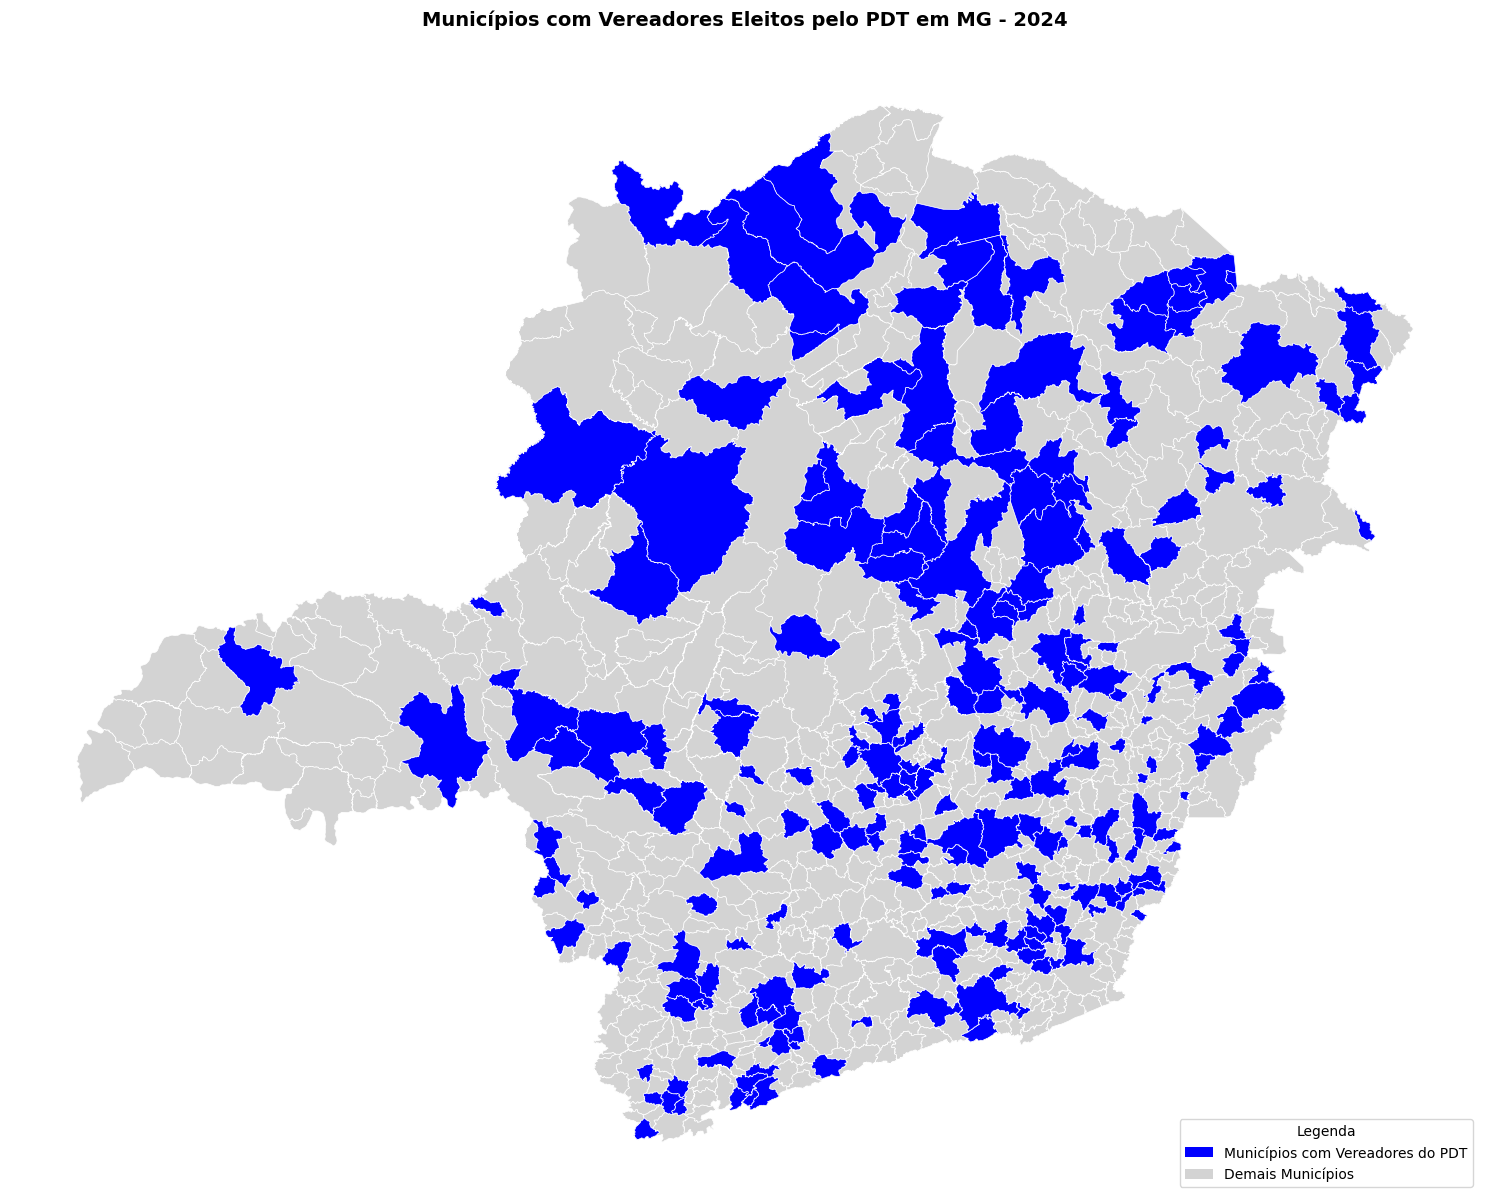


Municípios do PDT que não foram encontrados no geodataframe:
- SÃO THOMÉ DAS LETRAS


In [11]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt

# Carregando os dados
geo_df = gpd.read_file(arquivo_BR_municipios_shapefile)
geo_df = geo_df[geo_df.SIGLA_UF == 'MG']

# Normalizando os nomes dos municípios em ambos os dataframes
geo_df['NM_MUN'] = geo_df['NM_MUN'].str.upper()
df['municipio'] = df['municipio'].str.upper()

# Fazendo o merge com o dataset dos vereadores eleitos
vereador_pdt_MG_2024_geo_df = geo_df.merge(df, left_on='NM_MUN', right_on='municipio', how='left')

# Criando o mapa
fig, ax = plt.subplots(figsize=(15, 15))

# Plotando todos os municípios em cinza claro
geo_df.plot(ax=ax, color='lightgray', edgecolor='white', linewidth=0.5)

# Destacando os municípios com vereadores eleitos em azul
municipios_com_vereadores = vereador_pdt_MG_2024_geo_df[vereador_pdt_MG_2024_geo_df['municipio'].notna()]

# Adicionando print para debug
print(f"Número de municípios com vereadores encontrados: {len(municipios_com_vereadores)}")
print("\nMunicípios encontrados:")
print(municipios_com_vereadores['municipio'].tolist())

if not municipios_com_vereadores.empty:
    municipios_com_vereadores.plot(
        ax=ax,
        color='blue',
        edgecolor='white',
        linewidth=0.5
    )

# Configurando o título e removendo os eixos
ax.set_title('Municípios com Vereadores Eleitos pelo PDT em MG - 2024',
             pad=20,
             size=14,
             fontweight='bold')
ax.axis('off')

# Adicionando uma legenda
from matplotlib.patches import Patch
legend_elements = [
    Patch(facecolor='blue', label='Municípios com Vereadores do PDT'),
    Patch(facecolor='lightgray', label='Demais Municípios')
]
ax.legend(handles=legend_elements,
         loc='lower right',
         title='Legenda',
         frameon=True)

# Ajustando o layout e definindo um aspect ratio adequado
plt.tight_layout()
ax.set_aspect('equal', adjustable='box')

# Exibindo o mapa
plt.show()

# Print adicional para verificar se há municípios que não deram match
if len(df) > len(municipios_com_vereadores):
    print("\nMunicípios do PDT que não foram encontrados no geodataframe:")
    municipios_nao_encontrados = set(df['municipio']) - set(municipios_com_vereadores['municipio'])
    for mun in municipios_nao_encontrados:
        print(f"- {mun}")